# Investigation of putative doublets
This notebook contains code used to analyze 885 putative doublet cells. We use `pyturbseq`, a package developed within the Gilbert Lab, to process the data and calculate genetic interaction linear models. We find that it is difficult to distinguish cells that were actually transduced with two independent guide vectors from 2 cells that were simply sequenced together in the same droplet.

Like the other notebooks, it makes use of a `/data` and `/output` top-level directory. The h5ad object it takes as input is converted from a Seurat object containing the 885 cells and their metadata.

In [33]:
import os
import anndata
import matplotlib

import numpy as np
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import scipy.sparse as sp
import scrublet as scr

from pyturbseq.utils import filter_adata
from pyturbseq.interaction import fit_many_parallel
from pathlib import Path

%matplotlib inline
matplotlib.rcParams['pdf.fonttype'] = 42

## Finding doublets using Scrublet

In [4]:
data_dir = "../data"

In [5]:
data = sc.read_h5ad(os.path.join(data_dir, "simplified_seurat.h5ad"))

In [6]:
source = "preinf"
condition = "noRT"
output_dir = f"../../output/coefficient_analysis/{source}_{condition}"
sc._settings.ScanpyConfig.figdir = Path(output_dir)
subset_data = data[data.obs.sourceCond == f"{source}_{condition}"]
subset_data

View of AnnData object with n_obs × n_vars = 16598 × 32289
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'nCount_SCT', 'nFeature_SCT', 'sorted', 'source', 'cond', 'SCT_snn_res.0.4', 'seurat_clusters', 'scMRMA', 'scMRMA_manual', 'sgRNA_UMI', 'sgRNA_logUMI', 'sgRNA_binary', 'sgRNA', 'sourceCond', 'sgRNACond', 'double', 'percent_mt'
    var: 'features'

Processing GL261_noRT_preinf
Number of cells (275, 32289)
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.24
Detected doublet rate = 3.6%
Estimated detectable doublet fraction = 11.8%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 30.8%
Elapsed time: 0.5 seconds


/var/folders/l1/pqzzqlsx5sbf53t_whv98w440000gn/T/ipykernel_13957/3046272384.py:13: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  subset.obs['predicted_doublets'] = predicted_doublets
/Users/christopher/Library/Caches/pypoetry/virtualenvs/genome-biology-methods-_cE-HaLl-py3.11/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Processing GL261_noRT_preinf_MACSFACS_1
Number of cells (5720, 32289)
Preprocessing...


/Users/christopher/Library/Caches/pypoetry/virtualenvs/genome-biology-methods-_cE-HaLl-py3.11/lib/python3.11/site-packages/scrublet/helper_functions.py:239: RuntimeWarning: invalid value encountered in log
  gLog = lambda input: np.log(input[1] * np.exp(-input[0]) + input[2])


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.61
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 0.9%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 9.5%
Elapsed time: 14.1 seconds


/var/folders/l1/pqzzqlsx5sbf53t_whv98w440000gn/T/ipykernel_13957/3046272384.py:13: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  subset.obs['predicted_doublets'] = predicted_doublets
/Users/christopher/Library/Caches/pypoetry/virtualenvs/genome-biology-methods-_cE-HaLl-py3.11/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Processing GL261_noRT_preinf_MACSFACS_2
Number of cells (5413, 32289)
Preprocessing...


/Users/christopher/Library/Caches/pypoetry/virtualenvs/genome-biology-methods-_cE-HaLl-py3.11/lib/python3.11/site-packages/scrublet/helper_functions.py:239: RuntimeWarning: invalid value encountered in log
  gLog = lambda input: np.log(input[1] * np.exp(-input[0]) + input[2])


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.60
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.8%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 0.0%
Elapsed time: 13.9 seconds


/var/folders/l1/pqzzqlsx5sbf53t_whv98w440000gn/T/ipykernel_13957/3046272384.py:13: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  subset.obs['predicted_doublets'] = predicted_doublets
/Users/christopher/Library/Caches/pypoetry/virtualenvs/genome-biology-methods-_cE-HaLl-py3.11/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Processing GL261_noRT_preinf_MACSFACS_3
Number of cells (5190, 32289)
Preprocessing...


/Users/christopher/Library/Caches/pypoetry/virtualenvs/genome-biology-methods-_cE-HaLl-py3.11/lib/python3.11/site-packages/scrublet/helper_functions.py:239: RuntimeWarning: invalid value encountered in log
  gLog = lambda input: np.log(input[1] * np.exp(-input[0]) + input[2])


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.59
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 1.3%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 4.3%
Elapsed time: 14.7 seconds


/var/folders/l1/pqzzqlsx5sbf53t_whv98w440000gn/T/ipykernel_13957/3046272384.py:13: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  subset.obs['predicted_doublets'] = predicted_doublets
/Users/christopher/Library/Caches/pypoetry/virtualenvs/genome-biology-methods-_cE-HaLl-py3.11/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


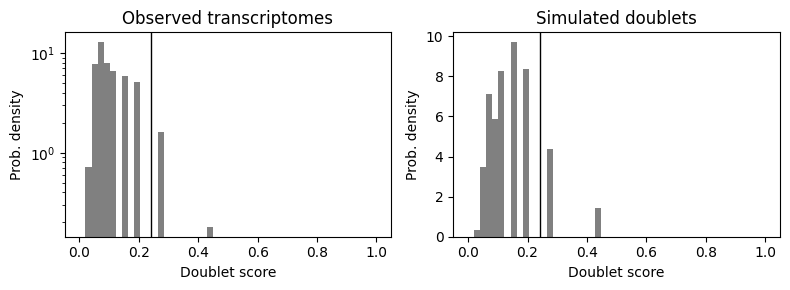

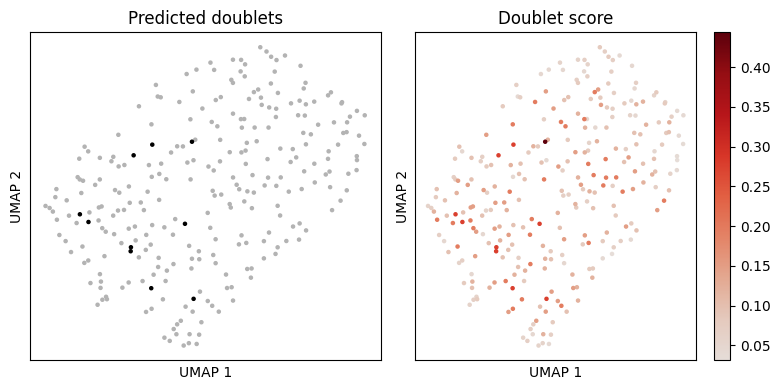

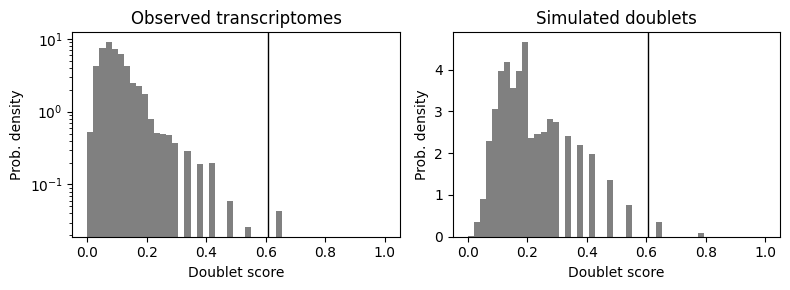

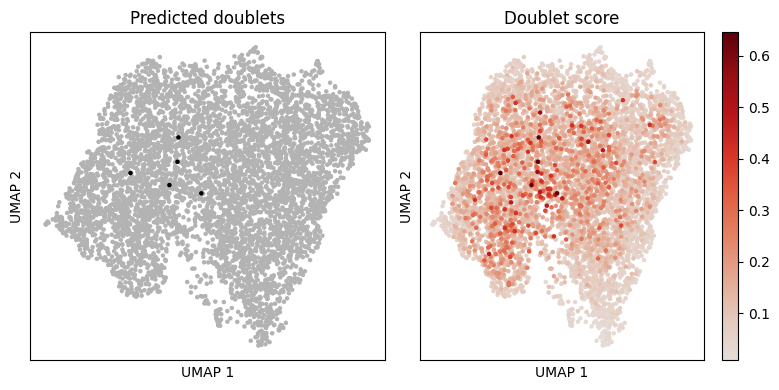

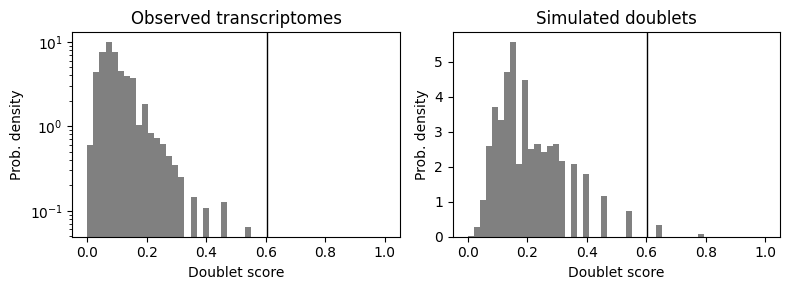

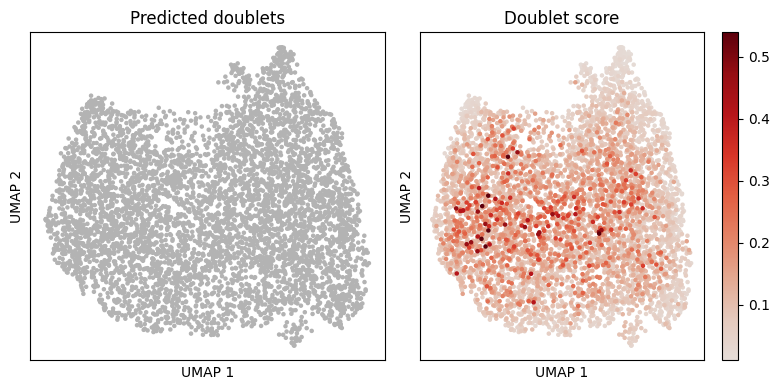

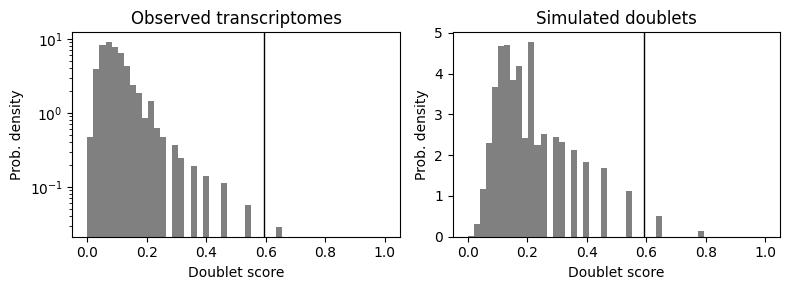

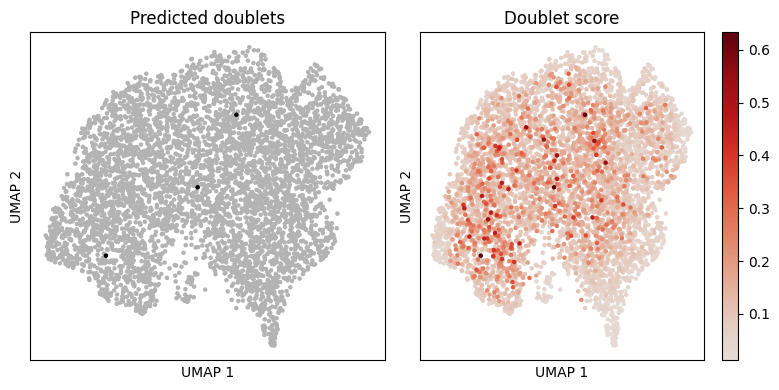

In [7]:
# Perform doublet detection for each of the samples
samples = np.unique(subset_data.obs[["orig.ident"]])
subsets = {}
for sample in samples:
    print(f"Processing {sample}")
    subset = subset_data[subset_data.obs["orig.ident"] == sample]
    print(f"Number of cells {subset.X.shape}")
    scrub = scr.Scrublet(subset.X, expected_doublet_rate=0.06)
    doublet_scores, predicted_doublets = scrub.scrub_doublets(min_counts=2, 
                                                          min_cells=3, 
                                                          min_gene_variability_pctl=85, 
                                                          n_prin_comps=30)
    subset.obs['predicted_doublets'] = predicted_doublets
    subset.obs['doublet_scores'] = doublet_scores
    subsets[sample] = subset
    scrub.plot_histogram()
    scrub.set_embedding('UMAP', scr.get_umap(scrub.manifold_obs_, 10, min_dist=0.3))
    scrub.plot_embedding('UMAP', order_points=True)

In [8]:
# Combine all of the obs for doublets together and see if they line up with the double cells
data_list = []
for name, adata in subsets.items():
    df = adata.obs[["predicted_doublets", "doublet_scores"]].copy()
    df["cell_name"] = adata.obs_names
    df["dataset"] = name
    data_list.append(df)
combined_df = pd.concat(data_list)

In [9]:
merged_obs = subset_data.obs.merge(combined_df, left_index=True, right_index=True, how='left')
subset_data.obs = merged_obs

In [10]:
crosstab = pd.crosstab(subset_data.obs['double'], subset_data.obs['predicted_doublets'])
crosstab_percent = crosstab.div(crosstab.sum(axis=1), axis=0) * 100
crosstab_percent

predicted_doublets,False,True
double,,
double,99.598394,0.401606
single,99.900621,0.099379


In [11]:
subset_data.obs['predicted_doublets'].value_counts()

predicted_doublets
False    16580
True        18
Name: count, dtype: int64

## Expression metrics analysis

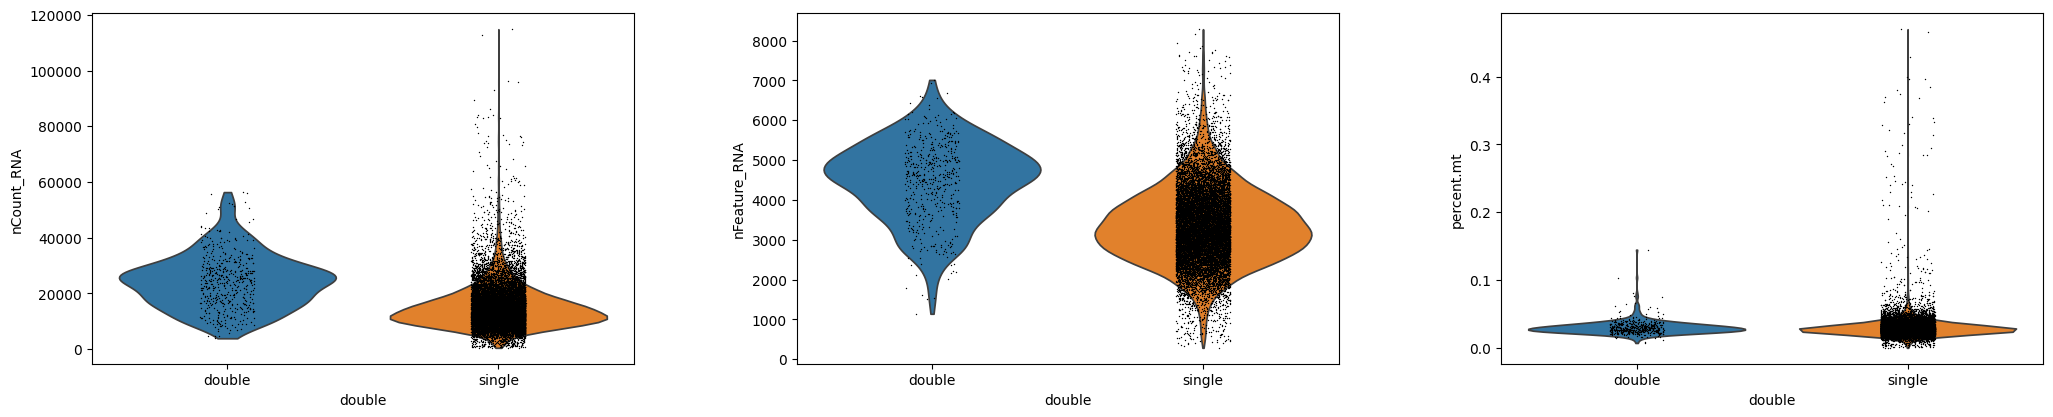

In [12]:
# Plot the existing Seurat QC metrics
subset_data
sc.pl.violin(subset_data, ['nCount_RNA', 'nFeature_RNA', 'percent.mt'], groupby="double", stripplot=True, save="qc_metrics.pdf")

In [14]:
# Calculate Scanpy QC metrics
subset_data.var['mt'] = subset_data.var_names.str.startswith('mt-')
sc.pp.calculate_qc_metrics(subset_data, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [17]:
# Filter the data
subset_data = filter_adata(
    subset_data,
    obs_filters=[
        "n_genes_by_counts > 2000",
        "pct_counts_mt < 20",
        "total_counts > 6000",
    ],
    var_filters=[
        'n_cells_by_counts > 50',
        'total_counts > 100'
    ]
    )
subset_data

View of AnnData object with n_obs × n_vars = 15552 × 12780
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'nCount_SCT', 'nFeature_SCT', 'sorted', 'source', 'cond', 'SCT_snn_res.0.4', 'seurat_clusters', 'scMRMA', 'scMRMA_manual', 'sgRNA_UMI', 'sgRNA_logUMI', 'sgRNA_binary', 'sgRNA', 'sourceCond', 'sgRNACond', 'double', 'percent_mt', 'predicted_doublets', 'doublet_scores', 'cell_name', 'dataset', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'features', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'double_colors'

In [18]:
# Do a coverage check for each sgRNA. We will eliminate any sgRNA from consideration
# that doesn't have at least 5 cells in both single and combination
mask = subset_data.obs.sgRNA.str.contains("_")
combinations = subset_data.obs.sgRNA[mask]
sgRNAs_to_keep = ["non-targeting"] # Keep non-targeting by default for normalization
sgRNA_counts = subset_data.obs.sgRNA.value_counts()
for combination in combinations:
    geneA = combination.split("_")[0]
    geneB = combination.split("_")[1]
    if sgRNA_counts[combination].item() > 5 and sgRNA_counts[geneA].item() > 5 and sgRNA_counts[geneB].item() > 5:
        sgRNAs_to_keep.extend([geneA, geneB, combination])
subset_data = subset_data[subset_data.obs.sgRNA.isin(sgRNAs_to_keep)].copy()
subset_data

AnnData object with n_obs × n_vars = 15167 × 12780
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'nCount_SCT', 'nFeature_SCT', 'sorted', 'source', 'cond', 'SCT_snn_res.0.4', 'seurat_clusters', 'scMRMA', 'scMRMA_manual', 'sgRNA_UMI', 'sgRNA_logUMI', 'sgRNA_binary', 'sgRNA', 'sourceCond', 'sgRNACond', 'double', 'percent_mt', 'predicted_doublets', 'doublet_scores', 'cell_name', 'dataset', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'features', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'double_colors'

In [19]:
# Process subset_data so that its perturbations look like what we expect
def modify_sgRNA(sgRNA):
    if sgRNA == "non-targeting":
        return "NTC"
    elif "_" in sgRNA:
        return sgRNA.replace("_", "|")
    else:
        return sgRNA
subset_data.obs["perturbation"] = subset_data.obs["sgRNA"].apply(modify_sgRNA)
print(subset_data.obs[['sgRNA', 'perturbation']])

                                sgRNA    perturbation
AAACGAAAGCTGAAAT-1_9           Ifnar1          Ifnar1
AAACGAAGTGCTGTCG-1_9            Fanca           Fanca
AAATGGAAGCAGCGAT-1_9           Cdkn1a          Cdkn1a
AAATGGACATATAGCC-1_9           Ifnar1          Ifnar1
AACGTCAAGCTGACTT-1_9           Cdkn1a          Cdkn1a
...                               ...             ...
TTTGGTTTCAACTACG-1_12         Cyp19a1         Cyp19a1
TTTGGTTTCATTGGTG-1_12          Ifnar1          Ifnar1
TTTGGTTTCTCTATGT-1_12          Cdkn2a          Cdkn2a
TTTGTTGCACCAAAGG-1_12           Abtb1           Abtb1
TTTGTTGTCTAGAACC-1_12  Ifnar1_Cyp19a1  Ifnar1|Cyp19a1

[15167 rows x 2 columns]


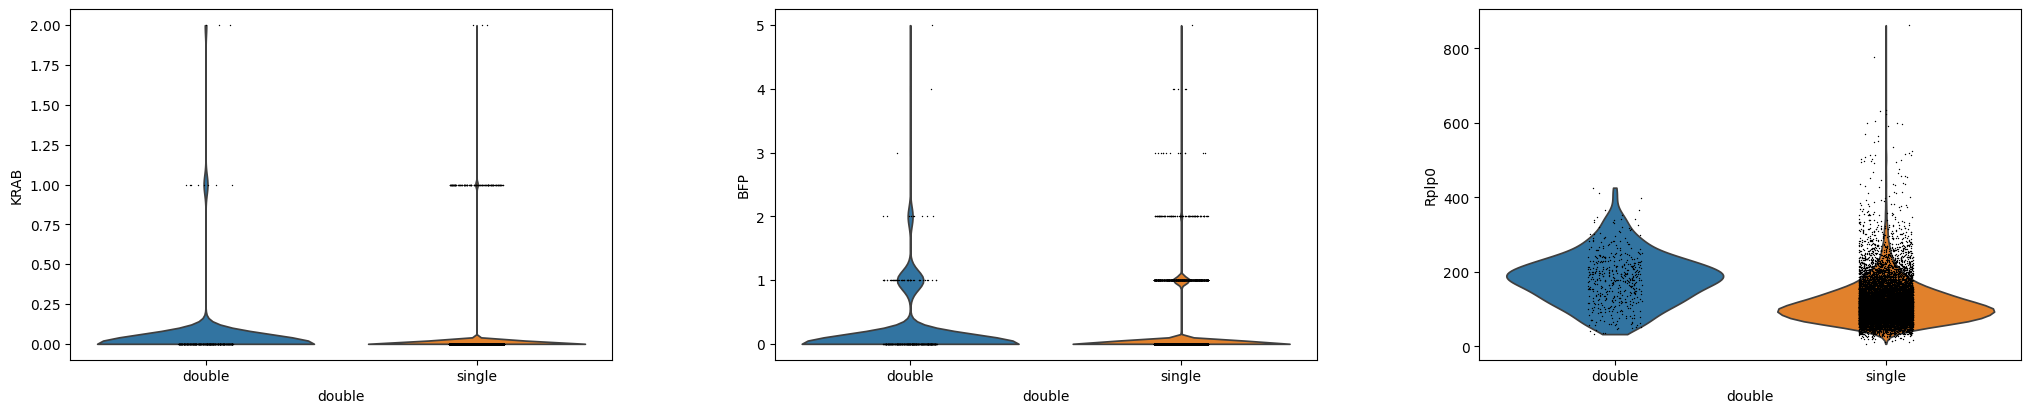

In [20]:
# Do some additional checks for doublets. What if we plot violin plots of Krab and Bfp, which should be
# constitutively expressed in all of the CRISPRi cells?
sc.pl.violin(
    subset_data,
    keys=["KRAB", "BFP", "Rplp0"],
    groupby="double",
    use_raw=False,
    stripplot=True,
    save="krab_bfp_rplp0_plot.pdf"
)

## Coefficient analysis

In [22]:
# Scanpy normalize
sc.pp.normalize_total(subset_data)
subset_data

AnnData object with n_obs × n_vars = 15167 × 12780
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'nCount_SCT', 'nFeature_SCT', 'sorted', 'source', 'cond', 'SCT_snn_res.0.4', 'seurat_clusters', 'scMRMA', 'scMRMA_manual', 'sgRNA_UMI', 'sgRNA_logUMI', 'sgRNA_binary', 'sgRNA', 'sourceCond', 'sgRNACond', 'double', 'percent_mt', 'predicted_doublets', 'doublet_scores', 'cell_name', 'dataset', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'perturbation'
    var: 'features', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'double_colors'

In [23]:
# Pseudobulk the cells by taking an average
def aggregate_by_perturbation(data, column="perturbation"):
    """
    Aggregate an Anndata object by a particular column and take the average for all cells
    """
    if column not in data.obs.columns:
        return ValueError(f"Column does not exist")

    unique_perturbations = data.obs[column].unique()
    pseudobulk_data = []
    pseudobulk_obs = []
    for group in unique_perturbations:
        subset = data[data.obs[column] == group]
        if sp.issparse(subset.X):
            mean_expr = np.array(subset.X.mean(axis=0)).flatten()
        else:
            mean_expr = np.mean(subset.X, axis=0)
        pseudobulk_data.append(mean_expr)
        pseudobulk_obs.append({column: group})

    pseudobulk_adata = anndata.AnnData(
        X=np.array(pseudobulk_data),
        obs=pd.DataFrame(pseudobulk_obs),
        var=data.var
    )
    return pseudobulk_adata

In [24]:
pb = aggregate_by_perturbation(subset_data, "perturbation")

/Users/christopher/Library/Caches/pypoetry/virtualenvs/genome-biology-methods-_cE-HaLl-py3.11/lib/python3.11/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [25]:
# Get combinations
mask = pb.obs.perturbation.str.contains("\|")
combinations = pd.unique(pb.obs.perturbation[mask])
combinations

array(['Cdkn2a|Mre11a', 'Ifnar1|Fanca', 'Ifnar1|Nat2', 'Cdkn1a|Xrcc5',
       'Cdkn2a|Ifnar1', 'Cdkn2a|Cdkn1a', 'Ifnar1|Sel1l', 'Ifnar1|Xrcc5',
       'Cdkn1a|Nat2', 'Cdkn2a|Cyp19a1', 'Ifnar1|Abtb1', 'Cdkn2a|Sel1l',
       'Xrcc3|Lig4', 'Ifnar1|Prkdc', 'Cdkn1a|Ifnar1', 'Cdkn2a|Fanca',
       'Ifnar1|Sass6', 'Cdkn2a|Trp53bp1', 'Ifnar1|Rad21', 'Ifnar1|Shc1',
       'Cyp19a1|Sel1l', 'Cdkn2a|Nat2', 'Cdkn2a|Ercc4', 'Ifnar1|Dclre1c',
       'Cdkn2a|Shc1', 'Cdkn1a|Sel1l', 'Ifnar1|Trp53bp1', 'Ifnar1|Ercc4',
       'Cdkn2a|Rad21', 'Cdkn2a|Abtb1', 'Ifnar1|Cyp19a1', 'Ifnar1|Eif2s1',
       'Ifnar1|Lig4', 'Cdkn1a|Fanca', 'Ifnar1|Bard1', 'Cdkn1a|Abtb1'],
      dtype=object)

In [27]:
def modify_sgRNA(sgRNA):
    if "|" in sgRNA:
        return sgRNA
    else:
        return "|".join(sorted(["NTC", sgRNA]))
pb.obs["perturbation"] = pb.obs["perturbation"].apply(modify_sgRNA)
pb.obs.index = pb.obs.perturbation

In [ ]:
res = fit_many_parallel(pb, combinations, processes = 8)

In [29]:
res.to_csv(os.path.join(output_dir, "pseudobulked_average_pyturbseq_results.csv"))

In [ ]:
res.loc[:, ["coef_a", "coef_b", "dcor_AB_fit", "score", "fit_spearmanr", "fit_pearsonr"]]

/var/folders/l1/pqzzqlsx5sbf53t_whv98w440000gn/T/ipykernel_13957/3903274838.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


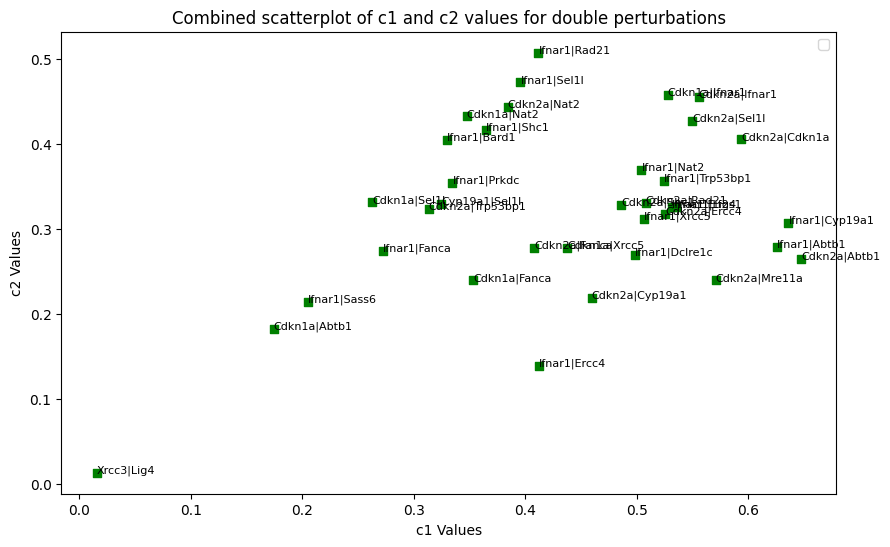

In [31]:
# Plot these results!
def plot_combined_scatter(df):
    plt.figure(figsize=(10, 6))
    points_ts = plt.scatter(df['coef_a'], df['coef_b'], color='green', marker='s')
    
    texts = []
    for idx in df.index:
        texts.append(plt.text(df.loc[idx, 'coef_a'], df.loc[idx, 'coef_b'], idx, color='black', fontsize=8))
        
    plt.xlabel('c1 Values')
    plt.ylabel('c2 Values')
    plt.title('Combined scatterplot of c1 and c2 values for double perturbations')
    plt.legend()
    plt.savefig(os.path.join(output_dir, "pyturbseq_pseudobulked_average_combined_scatter.png"))
    plt.show()
plot_combined_scatter(res)